<a href="https://colab.research.google.com/github/tsheltonking/Fraud-Detection-Demo/blob/master/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
from sklearn.linear_model import LogisticRegression

# Fetching Data & Dependencies

Download the fraud detection dataset manually at https://www.kaggle.com/c/ieee-fraud-detection/data or see instructions on how to get your Kaggle API Token here:
https://github.com/Kaggle/kaggle-api and add the resulting `.json` to your project directory before running the following:

In [0]:
with open('kaggle.json') as f:
    d = json.load(f)

In [0]:
os.environ['KAGGLE_USERNAME'] = d["username"]
os.environ['KAGGLE_KEY'] = d["key"]
! kaggle competitions download -c ieee-fraud-detection
!unzip train_transaction.csv.zip
!unzip train_identity.csv.zip
!unzip test_transaction.csv.zip
!unzip test_identity.csv.zip

files = os.getcwd()
for f in files:
  if ".zip" in f:
    os.remove(f)

# Data Preprocessing

In [0]:
train_transaction = pd.read_csv('train_transaction.csv')
test_transaction = pd.read_csv('test_transaction.csv')
train_identity = pd.read_csv('train_identity.csv')
test_identity = pd.read_csv('test_identity.csv')

train_df = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
test_df = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')

In [0]:
train_df.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,...,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_13,id_14,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,238269.000000,37627.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,589271.000000,309743.000000,327662.000000,421618.000000,280699.000000,73187.000000,38917.000000,74926.000000,74926.000000,514518.000000,311253.000000,64717.000000,61952.000000,62187.000000,...,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.00000,82351.000000,82351.000000,82351.000000,82351.000000,144233.000000,140872.000000,66324.000000,66324.000000,136865.000000,136865.000000,5155.000000,5155.000000,74926.000000,74926.000000,140978.000000,127320.000000,80044.000000,139369.000000,45113.000000,139318.000000,139261.000000,5159.000000,5169.000000,4747.000000,5132.000000,5163.000000,77586.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,118.502180,231.855423,14.092458,15.269734,0.005644,4.092185,5.571526,9.071082,2.848478,5.144574,4.480240,5.240343,10.241521,4.076227,32.539918,8.295215,94.347568,169.563231,28.343348,140.002441,42.335965,69.805717,41.638950,146.058108,0.561057,123.982137,146.621465,54.037533,17.901295,57.724444,...,13.103775,9.184612,0.058494,0.851040,0.296633,0.336790,1.312844,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882,-10.170502,174716.584708,0.060189,-0.058938,1.615585,-6.698710,13.285354,-38.600388,0.091023,-0.301124,99.745325,48.053071,-344.507146,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708,12.800927,329.608924,149.070308,26.508597
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,371.872026,529.053494,133.569018,154.668899,0.150536,68.848459,25.786976,71.508467,61.727304,95.378574,16.674897,95.581443,94.336292,86.666218,129.364844,49.544262,157.660387,177.315865,62.384721,191.096774,89.000144,143.669253,99.743264,231.663840,0.316880,182.615225,186.042622,124.274558,67.614425,136.312450,...,106.739813,73.627893,0.304415,3.950295,1.364356,1.580144,8.769083,4.727971,6217.223583,11169.275702,7955.735482,243.861391,387.62948,274.576920,668.486833,1095.034387,814.946722,14.347949,159651.816856,0.598231,0.701015,5.249856,16.491104,11.384207,26.084899,0.983842,2.789446,1.127602,11.774858,93.695502,30.375360,1.561302,141.095343,152.160327,198.847038,6.897665,2.372447,97.461089,32.101995,3.737502
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-122.000000,0.000000,-83.000000,0.000000,0.000000,0.000000,0.000000,-53.000000,-83.000000,0.000000,-193.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-100.000000,1.000000,-13.000000,-28.000000,-72.000000,-100.000000,-46.000000,-100.000000,-36.000000,-100.000000,90.000000,10.000000,-660.000000,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+0

In [0]:
test_df.describe()

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,...,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_13,id_14,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,5.066910e+05,5.066910e+05,506691.000000,506691.000000,498037.000000,503689.000000,502144.000000,441082.000000,441082.000000,215474.000000,36436.000000,506688.000000,506688.000000,506688.000000,506688.000000,506688.000000,506688.000000,506688.000000,506688.000000,506688.000000,506688.000000,506688.000000,506688.000000,501943.000000,506688.000000,500660.000000,271922.000000,303549.000000,429840.000000,282316.000000,124783.000000,60133.000000,74338.000000,74338.000000,494146.000000,330173.000000,69254.000000,123384.000000,115194.000000,494622.000000,...,76431.000000,76431.000000,76431.000000,76431.000000,76431.000000,76431.000000,76431.000000,76431.000000,7.643100e+04,7.643100e+04,7.643100e+04,76431.000000,76431.000000,76431.000000,76431.000000,76431.000000,76431.000000,141907.000000,136976.000000,66481.000000,66481.000000,134750.000000,134750.000000,5059.000000,5059.000000,74338.000000,74338.000000,136778.000000,130286.000000,71357.000000,135966.000000,50875.000000,135906.000000,135633.000000,5059.000000,5062.000000,4740.000000,5039.000000,5047.000000,70671.000000
mean,3.916894e+06,2.692994e+07,134.725568,9957.222175,363.735379,153.543409,200.162975,291.846514,86.723412,87.065270,237.175047,10.093211,10.714635,0.027403,2.385875,4.962701,6.854992,1.678173,1.893994,4.611943,1.810149,7.484594,2.649486,27.816035,6.083890,108.207504,188.666621,33.394727,175.060799,50.977752,82.443145,61.815642,160.834483,0.553981,159.810552,218.414895,77.404179,18.225961,58.163186,206.854137,...,1.216182,0.693514,0.047926,0.482658,0.163271,0.220486,0.460572,0.309900,3.151286e+02,4.404643e+02,3.811021e+02,24.708030,58.339468,35.485643,99.058760,155.578153,139.814706,-11.325734,192658.729909,0.053008,-0.087454,1.246033,-6.803829,12.493180,-36.577782,0.076219,-0.245877,99.750876,36.905715,-344.482672,191.070341,14.795735,350.122982,408.886230,507.727021,15.336823,13.166667,332.043064,152.752923,26.217939
std,1.462692e+05,4.756507e+06,245.779822,4884.960969,158.688653,12.443013,40.562461,102.062730,2.987328,314.131694,556.450834,79.334782,88.896921,0.227753,41.942977,25.462195,46.783565,37.874827,26.766115,21.282640,23.692393,61.322505,53.973060,101.114033,28.315616,176.964526,197.099611,82.558210,250.417470,116.829786,192.867671,150.299612,257.003738,0.317327,240.566557,253.091693,176.218548,78.079890,164.015525,269.419196,...,5.925144,3.343788,0.282497,2.555532,0.850853,1.789616,4.228813,2.632181,9.494045e+03,1.064843e+04,1.039556e+04,842.913287,990.361078,904.093921,2436.074522,4544.303974,4493.728267,14.508520,182613.277215,0.684551,0.840351,5.071394,15.921457,11.678206,25.544185,1.009687,2.120525,1.119819,13.206713,93.633156,30.749535,2.318496,139.140824,158.971756,227.371061,5.618032,3.222440,86.356683,31.916995,3.601046
min,3.663549e+06,1.840322e+07,0.018000,1001.000000,100.000000,100.000000,100.000000,100.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-100.000000,2.000000,-12.000000,-19.000000,-81.000000,-100.000000,-41.000000,-100.000000,-32.000000,-100.000000,90.000000,11.000000,-720.000000,100.000000,11.000000,100.000000,100.000000,100.000000,11.000000,10.000000,100.000000,100.000000,8.000000
25%,3.790222e+06,2.277154e

## Handling Missing & Non-numerical Data

In [0]:
# Collect stats for missing data
missing_df = pd.DataFrame({"na_count":train_df.isnull().sum().sort_values(ascending=False)})
missing_df["per"]=missing_df["na_count"]/len(train_df)

In [57]:
# Compare the ratio of fraudulent transactions.
print(len(train_df[train_df["isFraud"]==1])/len(train_df[train_df["isFraud"]==0])*100)

3.625870143908247


### Visualisation using Seaborn
>Display which columns in the training data contain the most missing information.

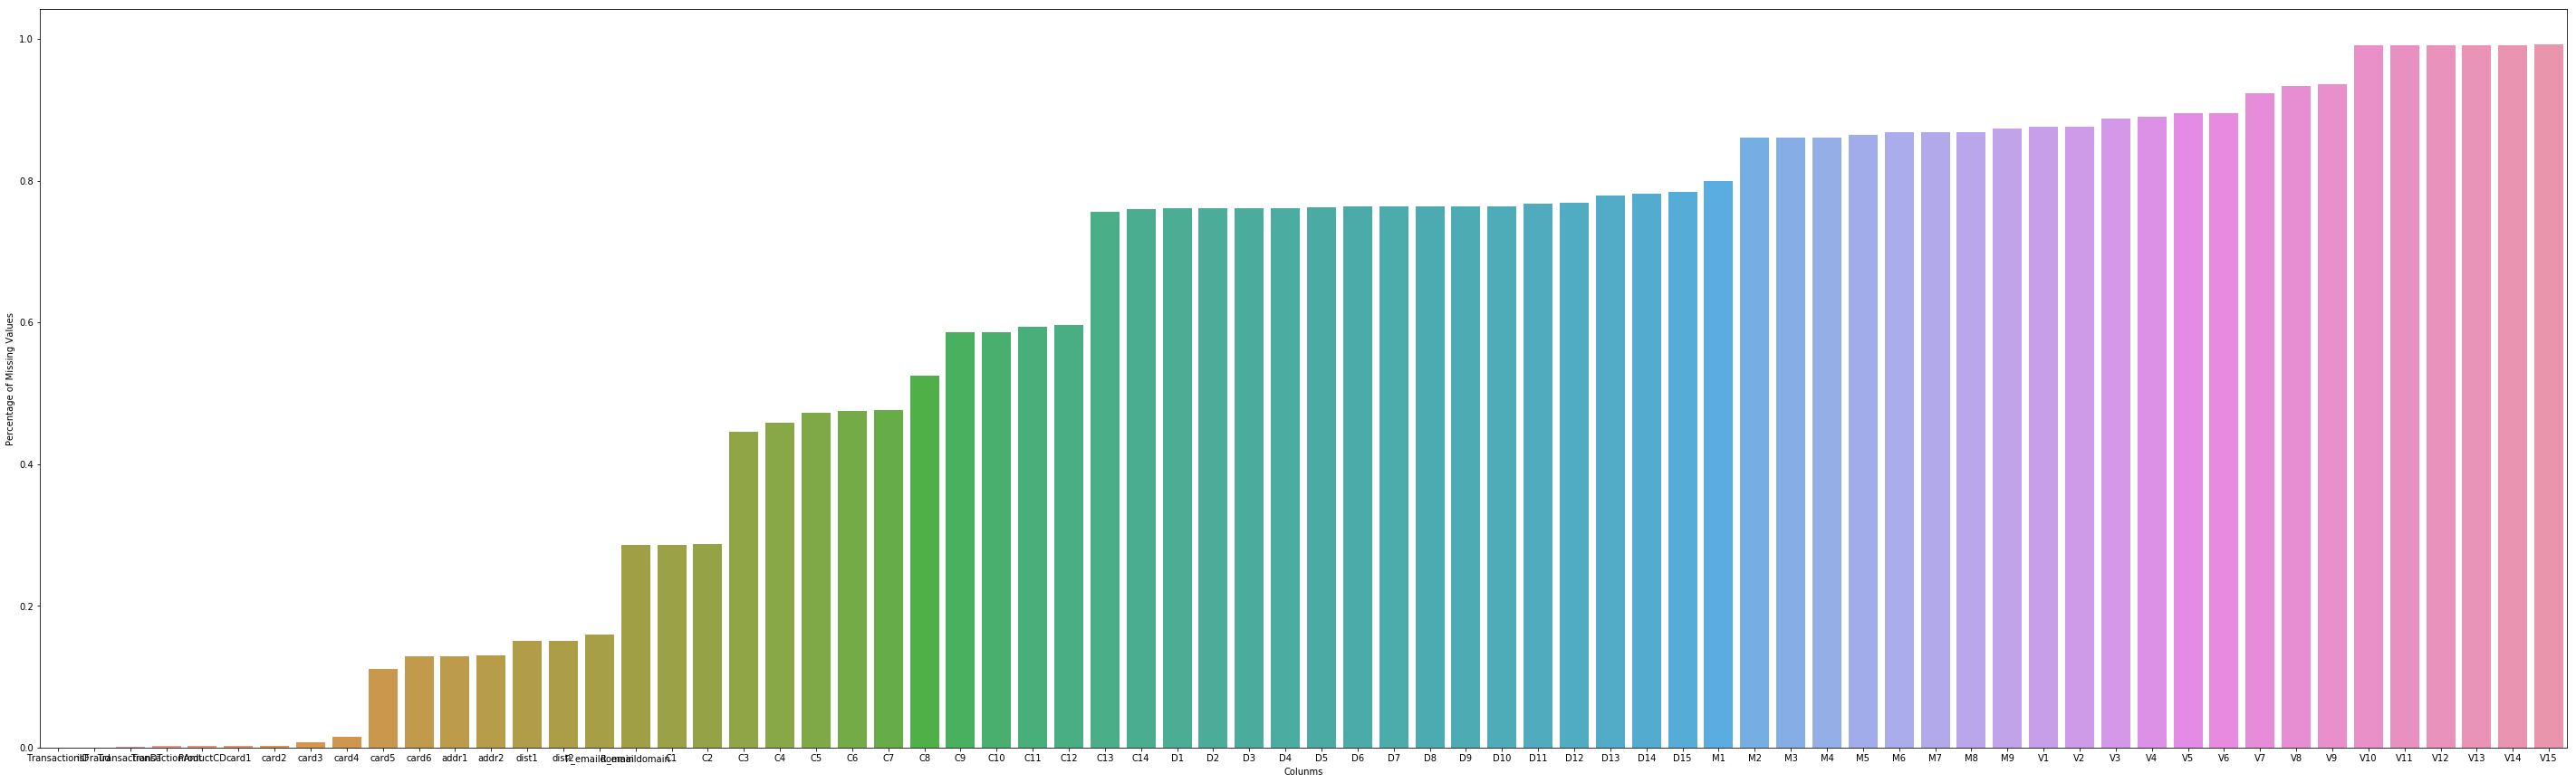

In [49]:
plt.figure(figsize=(50,15))
p = sns.barplot(x = 'na_count', y = 'per', data = missing_df)
p.set_xticklabels(list(train_df.columns))
p.set(xlabel='Colunms', ylabel='Percentage of Missing Values')
p

In [50]:
range=[0.05, 0.10, 0.15, 0.25, 0.40, 0.60, 0.75]
for i in range: 
    print (missing_df[missing_df["per"]<i].shape[0]/train_df.shape[1])

0.25806451612903225
0.25806451612903225
0.3686635944700461
0.41935483870967744
0.46543778801843316
0.5207373271889401
0.5207373271889401


In [0]:
# x_train = train_df.drop(["isFraud"], axis=1)
# y_train = drain_df["isFraud"]

# Modeling

In [0]:
model = LogisticRegression()